# Notebook to work with Altimetry and Lake Surface Area

In [698]:
% matplotlib inline
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [699]:
GRLM = "345_GRLM10.txt"; print GRLM
df_grlm = pd.read_csv(GRLM, skiprows=43, delim_whitespace=True, names="mission,cycle,date,hour,minute,lake_height,error,mean(decibels),IonoCorrection,TropCorrection".split(","), engine='python', index_col=False)
df_grlm.head(5)

345_GRLM10.txt


,mission,cycle,date,hour,minute,lake_height,error,mean(decibels),IonoCorrection,TropCorrection
0,OSTM,1,20080712,23,24,999.99,99.999,999.99,AMR,GIM
1,OSTM,2,20080722,21,23,-0.49,0.054,47.27,AMR,GIM
2,OSTM,3,20080801,19,21,-0.53,0.055,43.11,AMR,GIM
3,OSTM,4,20080811,17,20,-0.83,0.054,43.55,AMR,GIM
4,OSTM,5,20080821,15,18,-1.05,0.061,42.62,AMR,GIM


### GRLM Altimetry data from July 22 2008 to September 3, 2016
Create new columns of year, month, day in a convenient format

In [700]:
df_grlm = pd.read_csv(GRLM, skiprows=43, delim_whitespace=True, names="mission,cycle,date,hour,minute,lake_height,error,mean(decibels),IonoCorrection,TropCorrection".split(","), engine='python', index_col=False)
def get_year(date): return int(str(date)[0:4])
def get_month(date): return int(str(date)[4:6])
def get_day(date): return int(str(date)[6:])
df_grlm['year'] = df_grlm['date'].apply(get_year)
df_grlm['month'] = df_grlm['date'].apply(get_month)
df_grlm['day'] = df_grlm['date'].apply(get_day)
df_grlm = df_grlm.where(df_grlm.minute < 61 ) # remove lines that do not have time
df_grlm = df_grlm.where(df_grlm.lake_height < 900 ) # remove entries that do not have lake-height

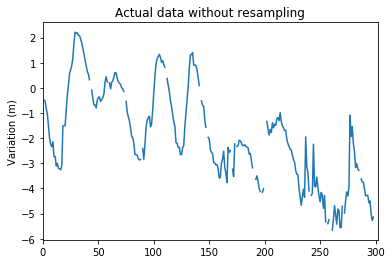

In [701]:
df_grlm.lake_height.plot(); plt.title("Actual data without resampling"); plt.ylabel("Variation (m)")

### Interpolate the missing data points

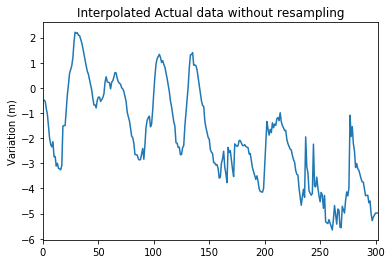

In [702]:
df_grlm.lake_height.interpolate().plot(); plt.title("Interpolated Actual data without resampling"); plt.ylabel("Variation (m)")

### Add time information to the dataframe

In [703]:
df = df_grlm
df[["year", "month", "day", "hour", "minute"]] = df[["year", "month", "day", "hour", "minute"]].fillna(0).astype(int)
df['Time'] = df.year.astype(str).str.cat(df.month.astype(str).astype(str), sep='-').str.cat(df.day.astype(str), sep='-')\
                .str.cat(df.hour.astype(str).astype(str), sep='-').str.cat(df.minute.astype(str).astype(str), sep='-')
df = df.where(df.year>10) # to ger rid of all the nan values
df.index = pd.to_datetime(pd.Series(df["Time"]), format="%Y-%m-%d-%H-%M"); 
print df.index[0:3], df.index[-3:]

DatetimeIndex(['NaT', '2008-07-22 21:23:00', '2008-08-01 19:21:00'], dtype='datetime64[ns]', name=u'Time', freq=None) DatetimeIndex(['2016-09-03 16:02:00', 'NaT', 'NaT'], dtype='datetime64[ns]', name=u'Time', freq=None)


### Resample the data to get monthly and annual variation in lake height

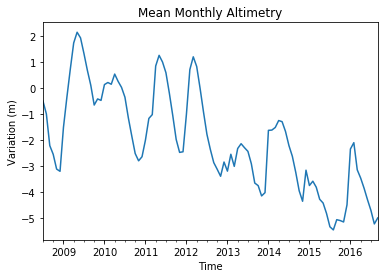

In [704]:
df["lake_height"].resample("M").mean().plot(); plt.title("Mean Monthly Altimetry"); plt.ylabel("Variation (m)")

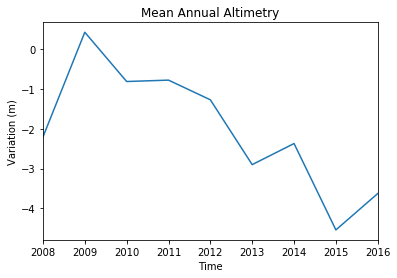

In [705]:
df["lake_height"].resample("A").mean().plot(); plt.title("Mean Annual Altimetry"); plt.ylabel("Variation (m)")

### MODIS data Lake Surface Area (Feb 18, 2000 to Aug 13, 2015)

In [706]:
df_modis = pd.read_csv('MODIS_t.txt', names=["Area"], engine='python', index_col=False)
df_time = pd.read_csv('DV.txt', sep = "\t", names=["Year", "Month", "Day", "", "", ""], engine='python', index_col=False)
df_time['Time'] = df_time.Year.astype(str).str.cat(df_time.Month.astype(str).astype(str), sep='-').str.cat(df_time.Day.astype(str), sep='-')
df_time = df_time.where(df_time.Year>10) # to ger rid of all the nan values
df_modis.index = pd.to_datetime(pd.Series(df_time["Time"]), format="%Y-%m-%d")#df.index[0:3]

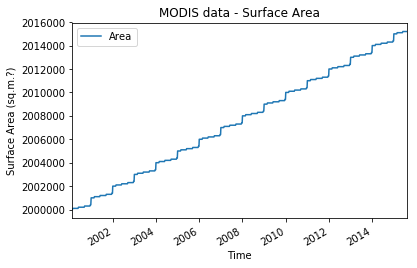

In [707]:
df_modis.plot(); plt.title("MODIS data - Surface Area"); plt.ylabel("Surface Area (sq.m.?)")

# Create subsets of both vectors (altimetry and surface area) for the overlapping period

DatetimeIndex(['2008-07-23', '2008-07-24', '2008-07-25', '2008-07-26',
               '2008-07-27', '2008-07-28', '2008-07-29', '2008-07-30',
               '2008-07-31', '2008-08-01',
               ...
               '2015-08-04', '2015-08-05', '2015-08-06', '2015-08-07',
               '2015-08-08', '2015-08-09', '2015-08-10', '2015-08-11',
               '2015-08-12', '2015-08-13'],
              dtype='datetime64[ns]', name=u'Time', length=2578, freq=None)

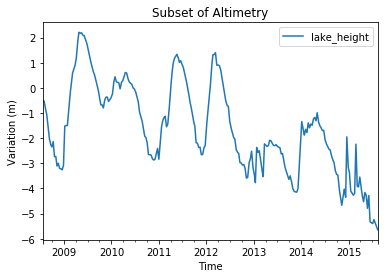

In [708]:
df_glrm_subset = df["lake_height"].resample("D").mean().interpolate()
df_glrm_subset = df_glrm_subset[(df_glrm_subset.index > '2008-07-22') & (df_glrm_subset.index <= '2015-08-13')]
df_glrm_subset.plot(); plt.legend(); plt.title("Subset of Altimetry"); plt.ylabel("Variation (m)")
df_glrm_subset.index

DatetimeIndex(['2008-07-23', '2008-07-24', '2008-07-25', '2008-07-26',
               '2008-07-27', '2008-07-28', '2008-07-29', '2008-07-30',
               '2008-07-31', '2008-08-01',
               ...
               '2015-08-04', '2015-08-05', '2015-08-06', '2015-08-07',
               '2015-08-08', '2015-08-09', '2015-08-10', '2015-08-11',
               '2015-08-12', '2015-08-13'],
              dtype='datetime64[ns]', name=u'Time', length=2578, freq='D')

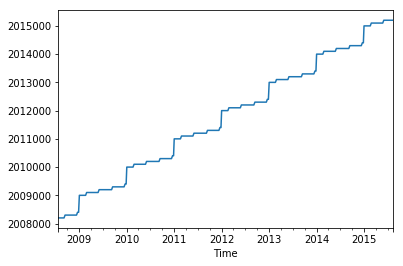

In [709]:
df_modis_daily = df_modis["Area"].resample("D").mean().interpolate()
df_modis_subset = df_modis_daily[(df_modis_daily.index > '2008-07-22') & (df_modis_daily.index <= '2015-08-13')]
df_modis_subset.plot()
df_modis_subset.index

In [710]:
# QA: Create a time series of time alone, to check the number of data points that we should have for days. 
#Note the vaiable called length
print pd.date_range('22/07/2008', periods=len(df_modis_subset), freq='D')

DatetimeIndex(['2008-07-22', '2008-07-23', '2008-07-24', '2008-07-25',
               '2008-07-26', '2008-07-27', '2008-07-28', '2008-07-29',
               '2008-07-30', '2008-07-31',
               ...
               '2015-08-03', '2015-08-04', '2015-08-05', '2015-08-06',
               '2015-08-07', '2015-08-08', '2015-08-09', '2015-08-10',
               '2015-08-11', '2015-08-12'],
              dtype='datetime64[ns]', length=2578, freq='D')


In [711]:
# Check if the two vectors are of the same length
print len(df_glrm_subset.tolist()), len(df_modis_subset.tolist())

2578 2578


# Compute correlation coefficient

In [712]:
import numpy
cor = numpy.corrcoef(df_glrm_subset.resample("W").mean().interpolate().tolist(), 
                     df_modis_subset.resample("W").mean().interpolate().tolist())
print "correlation coefficient is: " , cor[0][1]

correlation coefficient is:  -0.612126394148
